## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.set_option('display.max_columns', None)

## Data Loading

In [3]:
rides = pd.read_csv('rideshare_kaggle.csv')
rides.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Data Preprocessing

### Inference Data

In [4]:
inference = rides.sample(10, random_state=23)
rides = rides.drop(inference.index)
inference

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
305558,5ccbd41a-2d48-4f11-8bf9-a3d231308530,1.543882e+09,0,4,12,2018-12-04 00:13:02,America/New_York,Northeastern University,Financial District,Lyft,lyft_line,Shared,9.0,4.09,1.0,42.3429,-71.1003,46.36,44.64,Clear,Foggy in the morning.,0.0,0.0,0.57,4.03,6.32,1543856400,10.000,57.42,1543852800,33.60,1543921200,56.75,1543852800,28.23,1543914000,clear-night,31.82,1002.03,266,0.01,0,10.000,326.9,1543838263,1543871634,0.89,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
19142,dac522c6-470c-4611-a562-d3e712fb10f8,1.543436e+09,20,28,11,2018-11-28 20:17:09,America/New_York,Theatre District,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.0,1.61,1.0,42.3644,-71.0661,41.91,36.71,Overcast,Mostly cloudy throughout the day.,0.0,0.0,0.60,8.42,13.00,1543431600,10.000,42.57,1543438800,37.37,1543489200,36.55,1543438800,31.91,1543478400,cloudy,29.05,992.85,295,1.00,0,10.000,355.0,1543405938,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
274878,73b260d3-0499-4208-9e56-09d6854c8ebb,1.544947e+09,7,16,12,2018-12-16 07:50:05,America/New_York,Beacon Hill,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,10.0,1.75,1.0,42.3519,-71.0643,40.19,35.10,Partly Cloudy,Rain throughout the day.,0.0,0.0,0.69,7.48,9.70,1545015600,10.000,43.70,1544990400,34.07,1545044400,38.29,1544986800,28.11,1545044400,partly-cloudy-night,30.69,1023.03,54,0.20,0,10.000,299.3,1544962119,1544994844,0.30,0.1261,1544979600,39.07,1544954400,43.70,1544990400,33.64,1545019200,38.29,1544986800
466719,7e6e4773-d6e0-46d4-9f6f-bcb814567b74,1.544761e+09,4,14,12,2018-12-14 04:20:13,America/New_York,Theatre District,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.57,1.0,42.3559,-71.0550,31.10,31.10,Overcast,Partly cloudy throughout the day.,0.0,0.0,0.71,1.66,2.42,1544738400,9.849,33.96,1544731200,27.21,1544781600,32.95,1544734800,24.55,1544785200,cloudy,22.68,1034.90,200,1.00,0,9.849,310.1,1544702790,1544735601,0.21,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
343383,00d69a4b-77b7-434a-b209-1d176e72831e,1.543885e+09,0,4,12,2018-12-04 00:53:03,America/New_York,Boston University,West End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,3.04,1.0,42.3429,-71.1003,46.36,44.64,Clear,Foggy in the morning.,0.0,0.0,0.57,4.03,6.32,1543856400,10.000,57.42,1543852800,33.60,1543921200,56.75,1543852800,28.23,1543914000,clear-night,31.82,1002.03,266,0.01,0,10.000,326.9,1543838263,1543871634,0.89,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
19296,ad0cc1ac-9d50-4ace-aa3f-82950340dee9,1.544990e+09,19,16,12,2018-12-16 19:55:11,America/New_York,North Station,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,34.0,3.32,1.0,42.3644,-71.0661,43.06,38.26,Overcast,Rain throughout the day.,0.0,0.0,0.71,8.12,13.44,1545015600,10.000,43.74,1544990400,34.07,1545044400,38.36,1544986800,28.17,1545044400,cloudy,34.25,1015.00,71,1.00,0,10.000,322.7,1544962122,1544994842,0.30,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1545019200,38.36,1544986800
10622,a640ba0c-d725-4a65-bf52-bc7afb81d173,1.543583e+09,13,30,11,2018-11-30 13:02:58,Ameri

### Split data

In [5]:
train_df, test_df = train_test_split(rides, test_size=0.2, random_state=23)

In [6]:
train_df.shape

(554448, 57)

In [7]:
test_df.shape

(138613, 57)

### Missing Value Handling

#### Train

In [8]:
train_df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          44065
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [9]:
train_df = train_df.dropna()

In [10]:
train_df.shape

(510383, 57)

#### Test

In [11]:
test_df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          11030
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [12]:
test_df = test_df.dropna()

In [13]:
test_df.shape

(127583, 57)

In [14]:
test_df.isna().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                          False
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

### Outlier Handling

<AxesSubplot:xlabel='price'>

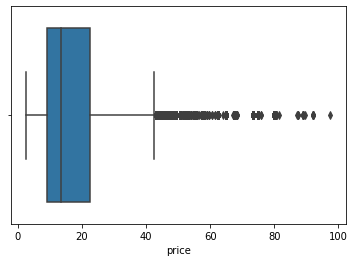

In [15]:
sns.boxplot(x='price', data=train_df)

In [16]:
IQR = train_df['price'].quantile(0.75) - train_df['price'].quantile(0.25)
lower_bound = train_df['price'].quantile(0.25) - (IQR * 1.5)
upper_bound = train_df['price'].quantile(0.75) + (IQR * 1.5)

In [17]:
print(f'Number of outlier: {train_df[(train_df.price < lower_bound) | (train_df.price > upper_bound)].shape[0]}')

Number of outlier: 4444


In [18]:
train_df = train_df[(train_df.price > lower_bound) & (train_df.price < upper_bound)]

In [19]:
train_df.shape

(505939, 57)

### Feature Selection

data train pertama diisi dengan yang saya asumsikan feature yang berpengaruh (4 features)

data train kedua diisi berdasarkan feature yang memiliki correlation secara statistik (3 features)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_df[['cab_type', 'name', 'distance', 'surge_multiplier']], train_df['price'], test_size=0.2, random_state=23)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_df[['cab_type', 'distance', 'surge_multiplier']], train_df['price'], test_size=0.2, random_state=23)

In [21]:
X_train.head()

,cab_type,name,distance,surge_multiplier
616989,Uber,UberPool,3.01,1.0
646836,Lyft,Lux Black,1.21,1.0
35220,Uber,Black SUV,1.94,1.0
603341,Uber,WAV,0.99,1.0
534056,Uber,WAV,1.22,1.0


In [22]:
X_train2.head()

,cab_type,distance,surge_multiplier
616989,Uber,3.01,1.0
646836,Lyft,1.21,1.0
35220,Uber,1.94,1.0
603341,Uber,0.99,1.0
534056,Uber,1.22,1.0


In [23]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

num_cols2 = X_train2.select_dtypes(include=['int64', 'float64']).columns
cat_cols2 = X_train2.select_dtypes(include=['object']).columns 

In [24]:
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]
X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

X_train2_num = X_train2[num_cols2]
X_train2_cat = X_train2[cat_cols2]
X_test2_num = X_test2[num_cols2]
X_test2_cat = X_test2[cat_cols2]

In [25]:
X_train_cat.cab_type.nunique()

2

In [26]:
X_train_cat.name.nunique()

12

### Feature Scaling

In [27]:
scaler = StandardScaler()

first train data

In [28]:
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

second train data

In [29]:
X_train2_num_scaled = scaler.fit_transform(X_train2_num)
X_test2_num_scaled = scaler.transform(X_test2_num)

convert to dataframe

In [30]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

X_train2_num_scaled = pd.DataFrame(X_train2_num_scaled, columns=X_train2_num.columns)
X_test2_num_scaled = pd.DataFrame(X_test2_num_scaled, columns=X_test2_num.columns)

### Feature Encoding

In [31]:
encoder = OneHotEncoder()
encoder2 = OneHotEncoder()

first train data

In [32]:
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

second train data

In [33]:
X_train2_cat_encoded = encoder2.fit_transform(X_train2_cat)
X_test2_cat_encoded = encoder2.transform(X_test2_cat)

convert to dataframe

In [34]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

X_train2_cat_encoded = pd.DataFrame(X_train2_cat_encoded.toarray(), columns=encoder2.get_feature_names(cat_cols2))
X_test2_cat_encoded = pd.DataFrame(X_test2_cat_encoded.toarray(), columns=encoder2.get_feature_names(cat_cols2))

### Concatenate

In [36]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train2 = pd.concat([X_train2_num_scaled, X_train2_cat_encoded], axis=1)
X_test2 = pd.concat([X_test2_num_scaled, X_test2_cat_encoded], axis=1)

In [37]:
X_train.head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.749203,-0.146703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.861083,-0.146703,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.208023,-0.146703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.057896,-0.146703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.852137,-0.146703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
X_train2.head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,0.749203,-0.146703,0.0,1.0
1,-0.861083,-0.146703,1.0,0.0
2,-0.208023,-0.146703,0.0,1.0
3,-1.057896,-0.146703,0.0,1.0
4,-0.852137,-0.146703,0.0,1.0


## Model Definition

In [39]:
model = LinearRegression()
model2 = LinearRegression()

## Model Training

In [40]:
model.fit(X_train, y_train)
model2.fit(X_train2, y_train2)

LinearRegression()

## Model Evaluation

In [43]:
print(f'First Model Train Score: {model.score(X_train, y_train)}')
print(f'Second Model Train Score: {model2.score(X_train2, y_train2)}')

print(f'First Model Test Score: {model.score(X_test, y_test)}')
print(f'Second Model Test Score: {model2.score(X_test2, y_test2)}')

First Model Train Score: 0.9332734158287515
Second Model Train Score: 0.12242339719249107
First Model Test Score: 0.9342383690701975
Second Model Test Score: 0.1263359226221783


## Inference (Model Testing)

In [45]:
inference

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
305558,5ccbd41a-2d48-4f11-8bf9-a3d231308530,1.543882e+09,0,4,12,2018-12-04 00:13:02,America/New_York,Northeastern University,Financial District,Lyft,lyft_line,Shared,9.0,4.09,1.0,42.3429,-71.1003,46.36,44.64,Clear,Foggy in the morning.,0.0,0.0,0.57,4.03,6.32,1543856400,10.000,57.42,1543852800,33.60,1543921200,56.75,1543852800,28.23,1543914000,clear-night,31.82,1002.03,266,0.01,0,10.000,326.9,1543838263,1543871634,0.89,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
19142,dac522c6-470c-4611-a562-d3e712fb10f8,1.543436e+09,20,28,11,2018-11-28 20:17:09,America/New_York,Theatre District,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.0,1.61,1.0,42.3644,-71.0661,41.91,36.71,Overcast,Mostly cloudy throughout the day.,0.0,0.0,0.60,8.42,13.00,1543431600,10.000,42.57,1543438800,37.37,1543489200,36.55,1543438800,31.91,1543478400,cloudy,29.05,992.85,295,1.00,0,10.000,355.0,1543405938,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
274878,73b260d3-0499-4208-9e56-09d6854c8ebb,1.544947e+09,7,16,12,2018-12-16 07:50:05,America/New_York,Beacon Hill,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,10.0,1.75,1.0,42.3519,-71.0643,40.19,35.10,Partly Cloudy,Rain throughout the day.,0.0,0.0,0.69,7.48,9.70,1545015600,10.000,43.70,1544990400,34.07,1545044400,38.29,1544986800,28.11,1545044400,partly-cloudy-night,30.69,1023.03,54,0.20,0,10.000,299.3,1544962119,1544994844,0.30,0.1261,1544979600,39.07,1544954400,43.70,1544990400,33.64,1545019200,38.29,1544986800
466719,7e6e4773-d6e0-46d4-9f6f-bcb814567b74,1.544761e+09,4,14,12,2018-12-14 04:20:13,America/New_York,Theatre District,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.57,1.0,42.3559,-71.0550,31.10,31.10,Overcast,Partly cloudy throughout the day.,0.0,0.0,0.71,1.66,2.42,1544738400,9.849,33.96,1544731200,27.21,1544781600,32.95,1544734800,24.55,1544785200,cloudy,22.68,1034.90,200,1.00,0,9.849,310.1,1544702790,1544735601,0.21,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
343383,00d69a4b-77b7-434a-b209-1d176e72831e,1.543885e+09,0,4,12,2018-12-04 00:53:03,America/New_York,Boston University,West End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,3.04,1.0,42.3429,-71.1003,46.36,44.64,Clear,Foggy in the morning.,0.0,0.0,0.57,4.03,6.32,1543856400,10.000,57.42,1543852800,33.60,1543921200,56.75,1543852800,28.23,1543914000,clear-night,31.82,1002.03,266,0.01,0,10.000,326.9,1543838263,1543871634,0.89,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
19296,ad0cc1ac-9d50-4ace-aa3f-82950340dee9,1.544990e+09,19,16,12,2018-12-16 19:55:11,America/New_York,North Station,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,34.0,3.32,1.0,42.3644,-71.0661,43.06,38.26,Overcast,Rain throughout the day.,0.0,0.0,0.71,8.12,13.44,1545015600,10.000,43.74,1544990400,34.07,1545044400,38.36,1544986800,28.17,1545044400,cloudy,34.25,1015.00,71,1.00,0,10.000,322.7,1544962122,1544994842,0.30,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1545019200,38.36,1544986800
10622,a640ba0c-d725-4a65-bf52-bc7afb81d173,1.543583e+09,13,30,11,2018-11-30 13:02:58,Ameri

In [46]:
inference_num = inference[num_cols]
inference_cat = inference[cat_cols]

inference2_num = inference[num_cols2]
inference2_cat = inference[cat_cols2]

In [49]:
inference_num_scaled = scaler.transform(inference_num)
inference2_num_scaled = scaler.transform(inference2_num)

In [50]:
inference_cat_encoded = encoder.transform(inference_cat)
inference2_cat_encoded = encoder2.transform(inference2_cat)

In [53]:
inference_final = np.concatenate([inference_num_scaled, inference_cat_encoded.toarray()], axis=1)
inference2_final = np.concatenate([inference2_num_scaled, inference2_cat_encoded.toarray()], axis=1)

In [55]:
y_pred_inf = pd.DataFrame(model.predict(inference_final), columns=['pred_model'])
y_pred_inf2 = pd.DataFrame(model2.predict(inference2_final), columns=['pred_model2'])

In [57]:
inference = inference.reset_index(drop=True)

In [60]:
pd.concat([inference[['cab_type', 'name', 'distance', 'surge_multiplier', 'price']], y_pred_inf, y_pred_inf2], axis=1)

,cab_type,name,distance,surge_multiplier,price,pred_model,pred_model2
0,Lyft,Shared,4.09,1.0,9.0,11.103577,21.323853
1,Uber,UberXL,1.61,1.0,14.0,14.111633,14.250610
2,Uber,UberX,1.75,1.0,10.0,8.587402,14.598755
3,Uber,Black SUV,1.57,1.0,27.5,28.426941,14.151123
4,Uber,UberPool,3.04,1.0,7.5,11.029236,17.806519
5,Lyft,Lux Black XL,3.32,1.0,34.0,34.069153,19.409180
6,Uber,UberPool,5.46,1.0,11.0,17.496338,23.824097
7,Lyft,Lux Black,2.45,1.0,22.5,23.096863,17.245728
8,Uber,UberX,1.11,1.0,7.5,6.877075,13.007324
9,Uber,Black SUV,3.30,1.0,37.0,33.050049,18.453003


In [62]:
print(f'First Model Train Mean Absolute Error (MAE): {mean_absolute_error(y_train, model.predict(X_train))}')
print(f'Second Model Train Mean Absolute Error (MAE): {mean_absolute_error(y_train2, model2.predict(X_train2))}')

First Model Train Mean Absolute Error (MAE): 1.677989098695334
Second Model Train Mean Absolute Error (MAE): 6.777634974996104


In [63]:
print(f'First Model Test Mean Absolute Error (MAE): {mean_absolute_error(y_test, model.predict(X_test))}')
print(f'Second Model Test Mean Absolute Error (MAE): {mean_absolute_error(y_test2, model2.predict(X_test2))}')

First Model Test Mean Absolute Error (MAE): 1.675631474281821
Second Model Test Mean Absolute Error (MAE): 6.778517980560858
